In [64]:
!pip install counter
import numpy as np
import scipy.stats
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import collections as coll
import math


df = pd.read_csv('combined_accel_01032020_10.csv')
print(df['timestamp'][0])







 
















1583055213400


In [65]:
df = df.sort_values(by='timestamp')


1583055213400
<class 'pandas.core.frame.DataFrame'>


In [66]:
df = df.drop_duplicates(subset ="timestamp")


1583055213400


In [104]:
timestamp = list(df['timestamp'])

from datetime import datetime   
res = []   
diff = [] 


p1 = 0
p2 = 1
while p2 < len(timestamp)-1:
    diff.append((timestamp[p2] - timestamp[p1]))
    p1 += 1
    p2 += 1
#diff=np.array(diff)
zeros = len(timestamp) - len(diff)
for i in range(zeros):
    diff.append(0)


df['difference'] = diff
print(df)
print(len(timestamp))
print(len(diff))
count= coll.Counter(diff)
print(count)





 

         index      timestamp  accuracy         x         y          z  \
0            0  1583055213400         3  1.547183 -0.263119  -9.609081   
1            1  1583055213481         3  1.542035 -0.272696  -9.611715   
2            2  1583055213673         3  1.548260 -0.265513  -9.610997   
3            3  1583055213865         3  1.540838 -0.274132  -9.613989   
4            4  1583055214060         3  1.544908 -0.270421  -9.608005   
...        ...            ...       ...       ...       ...        ...   
870321  870321  1583109217264         3 -4.217807 -0.310642  10.707001   
870322  870322  1583109217284         3 -4.143590  0.153813  10.623207   
870323  870323  1583109217304         3 -3.595342  0.254365   9.822382   
870324  870324  1583109217323         3 -3.114128  0.697273   8.992826   
870325  870325  1583109217342         3 -2.715510  1.171305   8.759401   

        difference  result  outcome  
0               81       1      gap  
1              192       1      gap

In [70]:
print(len(timestamp))

870326


In [41]:
print(min(diff))
print(max(diff))


0
91799


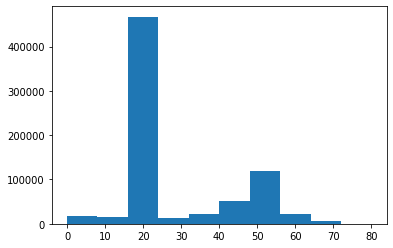

In [79]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

#values= np.random.normal(63,2,10000)
plt.hist(diff,bins=10, range=[0 , 80])
plt.show()



In [124]:
res = []    
res2 = []

for i in diff:
        if i < 70:
            res.append(1)
        else:
            res.append(0)
    
for i in diff:
        if i < 210:
            res2.append(1)
        else : 
            res2.append(0)
        
print(len(timestamp))
print(len(res))
print(zeros)

   
df['result'] = res
df['threshold (210)'] = res2
print(df)
        
  
 

870326
870326
2
        level_0      timestamp  accuracy         x         y          z  \
0             0  1583055213400         3  1.547183 -0.263119  -9.609081   
1             1  1583055213481         3  1.542035 -0.272696  -9.611715   
2             2  1583055213673         3  1.548260 -0.265513  -9.610997   
3             3  1583055213865         3  1.540838 -0.274132  -9.613989   
4             4  1583055214060         3  1.544908 -0.270421  -9.608005   
...         ...            ...       ...       ...       ...        ...   
870321   870321  1583109217264         3 -4.217807 -0.310642  10.707001   
870322   870322  1583109217284         3 -4.143590  0.153813  10.623207   
870323   870323  1583109217304         3 -3.595342  0.254365   9.822382   
870324   870324  1583109217323         3 -3.114128  0.697273   8.992826   
870325   870325  1583109217342         3 -2.715510  1.171305   8.759401   

        difference  result  outcome  threshold (210) outcome2  
0               81 

In [86]:
df[df['result']==0].shape

(499589, 7)

In [125]:
result = list(df['result'])
result2 = list(df['threshold (210)'])
outcome1 = []
outcome2 = []
for i in result:
    if i==1:
        outcome1.append('correct')
    else:
        outcome1.append('gap')

for i in result2:
    if i==1:
        outcome2.append('correct')
    else:
        outcome2.append('gap')        
df['outcome']=outcome1
df['outcome2']=outcome2
#df.head(10)

df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)


In [126]:
df.to_csv(r'C:\Users\AEJAZ\Desktop\CSV\accel_new1.csv')
 